# Proyecto Detección de objetos en el mar

In [3]:
%pip install scikit-image
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached matplotlib-3.9.2-cp312-cp312-macosx_10_12_x86_64.whl.metadata (11 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp312-cp312-macosx_10_9_universal2.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-macosx_10_9_x86_64.whl.metadata (6.4 kB)
Using cached matplotlib-3.9.2-cp312-cp312-macosx_10_12_x86_64.whl (7.9 MB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.53.1-cp312-cp312-macosx_10_9_universal2.whl (2.8 MB)
Using cached kiwisolver-1.4.5-cp312-cp312-macosx_10_9_x86_64.whl (67 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import *

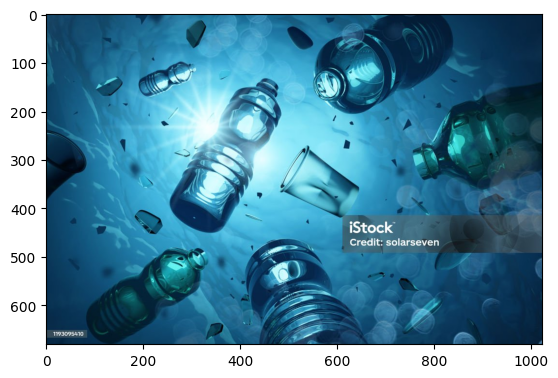

In [5]:
img = plt.imread('./Imagenes/prueba1.jpg')
plt.imshow(img)

def show2imgs(img1, img2):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray')
    plt.show()

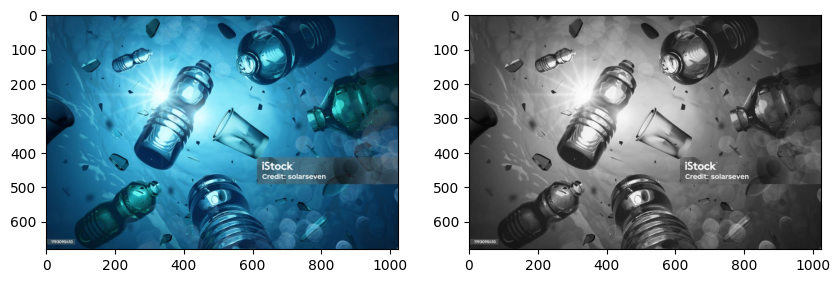

In [28]:
from skimage import exposure
from skimage import color
img_gray = color.rgb2gray(img)
show2imgs(img, img_gray)

# img_gray = ski.color.rgb2gray(img)
# eq_adapt = exposure.equalize_adapthist(img_gray)
# show2imgs(img_gray, eq_adapt)

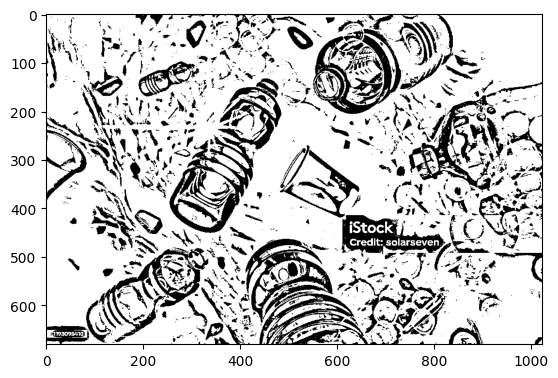

In [39]:
thresh = ski.filters.threshold_local(img_gray,35, offset=0.015)
binary = img_gray > thresh

plt.imshow(binary, cmap='gray')

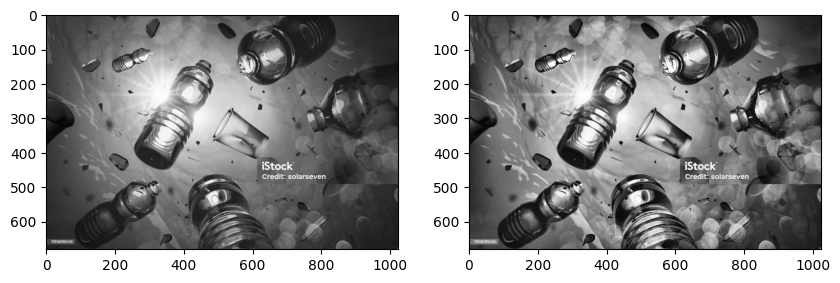

In [22]:
from skimage import exposure
eq_adapt = exposure.equalize_adapthist(img_gray)
show2imgs(img_gray, eq_adapt)

In [ ]:
cleaned = ski.morphology.remove_small_objects(binary.astype(bool), min_size=100)
cleaned = ski.morphology.remove_small_holes(cleaned, area_threshold=100)
plt.imshow(cleaned, cmap='gray')

In [ ]:
labeled = ski.measure.label(cleaned)
props = ski.measure.regionprops(labeled)

pen_mask = np.zeros_like(binary)
for prop in props:
    if prop.area > 1000 and prop.eccentricity > 0.99:  # Ajustar estos valores
        pen_mask[prop.coords[:, 0], prop.coords[:, 1]] = 1

plt.imshow(pen_mask, cmap='gray')

In [ ]:
result = img_gray * pen_mask
plt.imshow(result, cmap='gray')

In [ ]:
num_channels = img.shape[2]

# Aplicar la máscara y forzar fondo negro si es necesario
resultado = img.copy()
resultado[:, :, :num_channels] = np.multiply(img[:, :, :num_channels], np.dstack([pen_mask]))
resultado[:, :, 3] = 1 #Alpa a 1 es negro

# Mostrar el resultado

show2imgs(img,resultado)